# Taller 3 Aprendizaje de Máquina - One Class SVM

- Daniel Crovo
- Santiago Salazar

### Exploración de los datos (conjunto de pruebas)

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('./data/mnist_test.csv')


In [3]:
data_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


Se revisa la distribución de las clases, y se muestran algunas de las instancias del dataset 

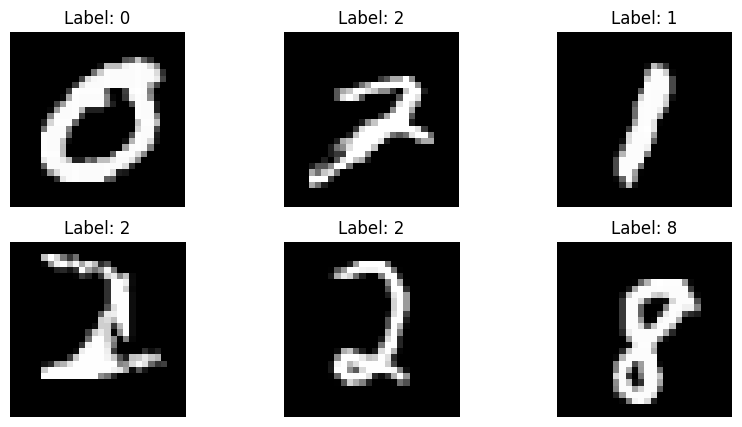

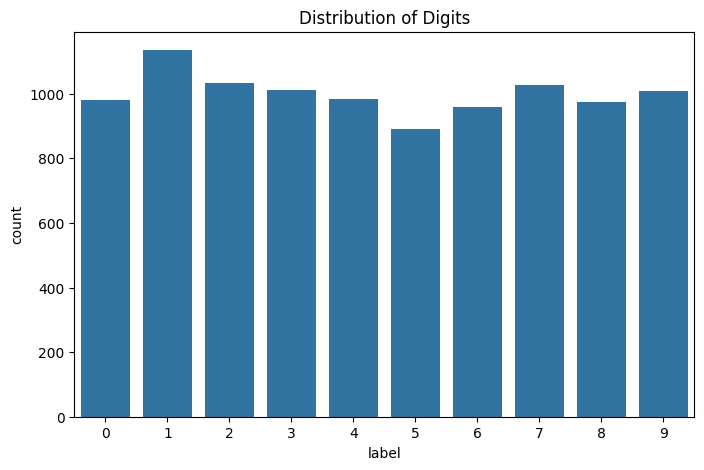

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize a few random images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    index = np.random.randint(0, len(data_df))
    plt.imshow(data_df.iloc[index, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {data_df.iloc[index, 0]}")
    plt.axis('off')
plt.show()

# Visualize label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data_df)
plt.title('Distribution of Digits')
plt.show()

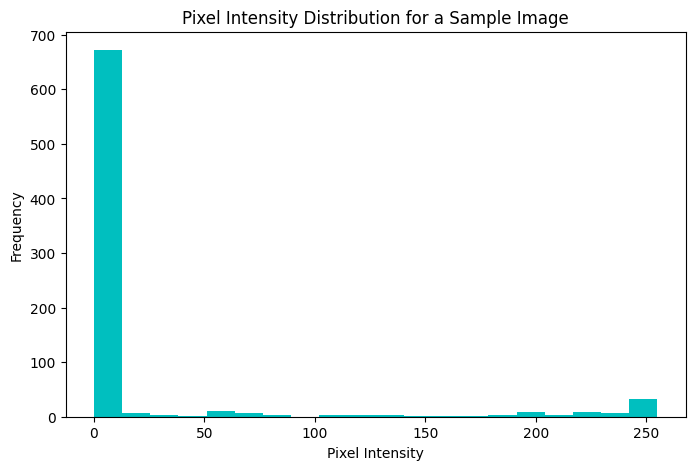

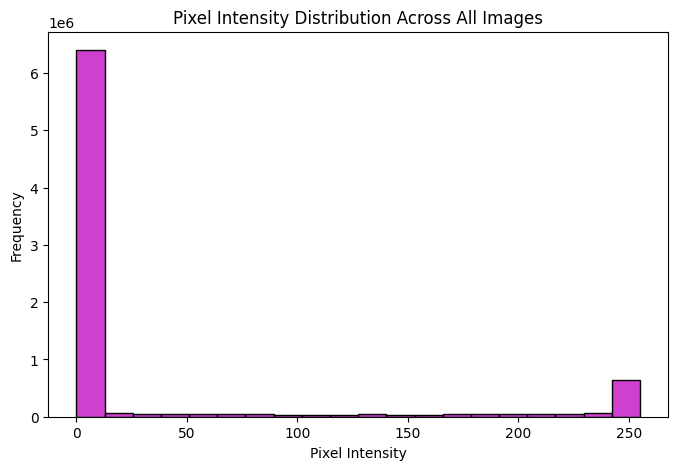

In [7]:
# Visualize pixel intensity distribution for a sample image
sample_image = data_df.iloc[0, 1:].values.reshape(28, 28)
plt.figure(figsize=(8, 5))
plt.hist(sample_image.flatten(), bins=20, color='c')
plt.title('Pixel Intensity Distribution for a Sample Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Visualize pixel intensity distribution across all images
plt.figure(figsize=(8, 5))
sns.histplot(data_df.iloc[:, 1:].values.flatten(), bins=20, color='m')
plt.title('Pixel Intensity Distribution Across All Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [43]:
from sklearn.svm import OneClassSVM


X = data_df.drop(['label'], axis=1).to_numpy()
X.shape

(10000, 784)

In [44]:
X.shape

(10000, 784)

In [45]:
svm = OneClassSVM(nu=0.05,  kernel='rbf', gamma=0.1, verbose=True)
outlier = svm.fit(X).predict(X)

[LibSVM]...............*..........*
optimization finished, #iter = 25500
obj = 12.500763, rho = 0.050000
nSV = 10000, nBSV = 0


In [46]:
outlier

array([ 1,  1,  1, ..., -1, -1, -1])

In [55]:
images = X.reshape(-1,28,28)

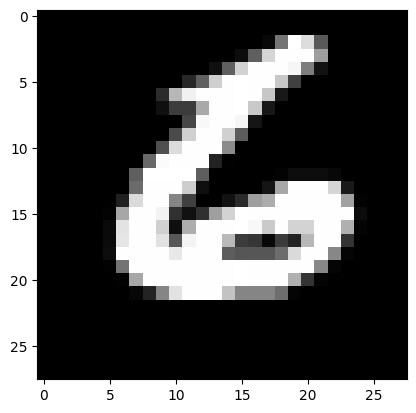

In [60]:
plt.imshow(images[-1,:,:], cmap='gray')